# AIT Development notebook

## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|1|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit|
| 4|import|1|you should write use import modules.<br>but bottom lines do not edit.|should edit|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from glob import glob
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

In [3]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()
    requirements_generator.add_package('pandas','2.2.3')
    requirements_generator.add_package('seaborn','0.13.0')
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.20-py3-none-any.whl (from -r /workdir/root/develop/requirements.txt (line 3))
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/f8/7f/5b047effafbdd34e52c9e2d7e44f729a0655efafb22198c45cf692cdc157/pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.5 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 5.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 6.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 kB 7.5 MB/s eta 0:00:00a 0:00:

In [4]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pathlib import Path
from os import makedirs, path

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [5]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('alyz_dataset_table_counts_comb_two_attr')
    manifest_genenerator.set_ait_description('表データ内の不要な（ありえない）属性値の組み合わせを指定し、表データ内にどれだけその不要なデータが含まれているか、属性値のカウントや出現割合を算出する\nAIT利用者はこのサマリ情報を元に、属性値の（出現傾向に着目した）不健全性を把握できる')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_alyz_dataset_table_counts_comb_two_attr')
    manifest_genenerator.set_ait_version('0.4')
    manifest_genenerator.add_ait_keywords('BDD100K')
    manifest_genenerator.add_ait_keywords('recode count')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/A-2データ設計の十分性')
    inventory_requirement_ca_data = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])
    manifest_genenerator.add_ait_inventories(name='ca_data', 
                                             type_='dataset', 
                                             description='分析対象の表データ(csv)\n1列目は属性名\n全属性がカテゴリ属性', 
                                             requirement=inventory_requirement_ca_data)
    inventory_requirement_Unsound_CA_combinations = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])
    manifest_genenerator.add_ait_inventories(name='Unsound_CA_combinations', 
                                             type_='attribute set', 
                                             description='分析対象外となる属性組み合わせ\n列名:PCA,PCV,SCA,SCV\nPCA:属性Aの名前\nPCV:属性Aの属性値\nSCA:属性Bの名前\nSCV:属性Bの属性値\n例えば"天候が雨かつ、道路が乾いている"という状況は現実にはあり得ないため、分析対象から除外できる。この場合、以下のように設定する\nPCA,PCV,SCA,SCV\nWeather,Rainy,Road condition,Dry', 
                                             requirement=inventory_requirement_Unsound_CA_combinations)
    manifest_genenerator.add_ait_parameters(name='PCA', 
                                            type_='str', 
                                            description='未使用', 
                                            default_val='Road type')
    manifest_genenerator.add_ait_parameters(name='PCV', 
                                            type_='str', 
                                            description='未使用', 
                                            default_val='Highway')
    manifest_genenerator.add_ait_parameters(name='SCA', 
                                            type_='str', 
                                            description='未使用', 
                                            default_val='Signal')
    manifest_genenerator.add_ait_parameters(name='SCV', 
                                            type_='str', 
                                            description='未使用', 
                                            default_val='Green')
    manifest_genenerator.add_ait_measures(name='count', 
                                          type_='int', 
                                          description='データセット内の不健全なケースのレコード数', 
                                          structure='single', 
                                          min='0')
    manifest_genenerator.add_ait_measures(name='percentage', 
                                          type_='float', 
                                          description='データセット内の不健全なケースの割合', 
                                          structure='single', 
                                          min='0', 
                                          max='100')
    manifest_genenerator.add_ait_resources(name='CountPlot', 
                                           type_='picture', 
                                           description='各不健全ケースのデータ数のプロット')
    manifest_genenerator.add_ait_resources(name='PercentagePlot', 
                                           type_='picture', 
                                           description='データ内の不健全なケースのパーセンテージのプロット')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

In [6]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='ca_data',
                                        value='ca_data/ca_labels_2036.csv')
    input_generator.add_ait_inventories(name='Unsound_CA_combinations',
                                        value='Unsound_CA_combinations/unsound_CA_combination_cases.csv')
    input_generator.set_ait_params(name='PCA',
                                   value='Road type')
    input_generator.set_ait_params(name='PCV',
                                   value='Highway')
    input_generator.set_ait_params(name='SCA',
                                   value='Signal')
    input_generator.set_ait_params(name='SCV',
                                   value='Green')
    input_generator.write()

In [7]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [8]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'count', 'percentage')
def calc_count_percentage(combination_cases_data):
    return combination_cases_data['count'].sum(), combination_cases_data['percentage'].sum()

@log(logger)
def calc_count_all(ca_data, combination_cases_data):
    total_data = len(ca_data)
    combination_cases_data['count']=0
    combination_cases_data['percentage']=0
    for i,_row in combination_cases_data.iterrows():
        temp_df=ca_data[ca_data[_row.PCA]==_row.PCV]
        temp_df=temp_df[temp_df[_row.SCA]==_row.SCV]
        combination_cases_data.loc[i,'count']=len(temp_df)
        combination_cases_data.loc[i,'percentage']=(len(temp_df)/len(ca_data))*100
    return combination_cases_data

In [9]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'CountPlot', 'error_ca_count_plot.png')
def save_count_plot(combination_cases_data_result, file_path: str=None) -> None:
    plt.figure(dpi=100, figsize=(8,6))
    combination_cases_data_result['count'].plot(kind = 'barh')
    plt.xlabel('Count')
    plt.ylabel('Index number')
    plt.title('Number of data in each unsound CA combination')
    plt.savefig(file_path)
    
    
@log(logger)
@resources(ait_output, path_helper, 'PercentagePlot', 'error_ca_percentage_plot.png')
def save_percentage_plot(combination_cases_data_result, file_path: str=None) -> None:
    plt.figure(dpi=100, figsize=(8,6))
    combination_cases_data_result['percentage'].plot(kind = 'bar')
    plt.xlabel('Index number')
    plt.ylabel('Percentage value(%) in 100%')
    plt.title('(%)Percentage of data in each unsound CA combination for total data')
    plt.savefig(file_path)
    

In [10]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:
    shutil.move(get_log_path(), file_path)

In [11]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:

    # インベントリを読み込み
    ca_data = pd.read_csv(ait_input.get_inventory_path('ca_data'))
    print('Number of total data samples: ', len(ca_data))
    combination_cases_data = pd.read_csv(ait_input.get_inventory_path('Unsound_CA_combinations'))
    combination_cases_data_result = calc_count_all(ca_data, combination_cases_data)
    
    calc_count_percentage(combination_cases_data_result)
    
    print('Unsound cases and their corresponding quanitites:\n',combination_cases_data_result)
    save_count_plot(combination_cases_data_result)
    save_percentage_plot(combination_cases_data_result)
    move_log()

Number of total data samples:  2036
Unsound cases and their corresponding quanitites:
          PCA      PCV             SCA           SCV  count  percentage
0    Weather    Snowy  Road condition           Dry      0    0.000000
1    Weather    Rainy  Road condition           Dry      2    0.098232
2  Road type  Highway          Signal         Green     21    1.031434
3  Road type  Highway          Signal           Red      6    0.294695
4  Road type  Highway          Signal        Yellow      1    0.049116
5  Road type  Highway  Zebra crossing           Yes      7    0.343811
6  Road type  Highway      Pedestrian       On road      2    0.098232
7  Road type  Highway      Pedestrian  On  sidewalk      0    0.000000


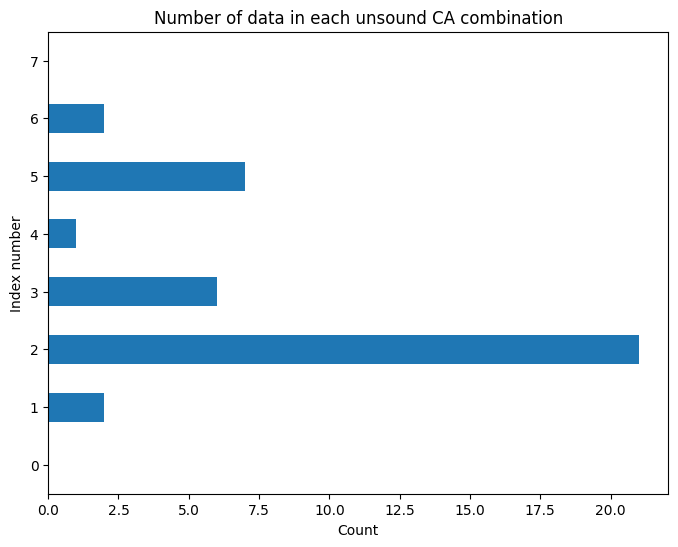

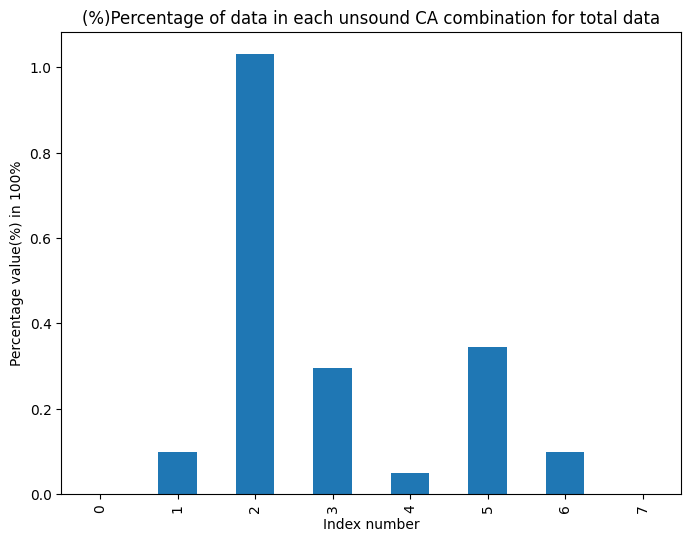

In [12]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [13]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [14]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
